In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/dataset_ocorrencias_delegacia_5.csv")
df.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


id_ocorrencia             data_ocorrencia       bairro tipo_crime  \
0     OCR100000  2024-08-02 19:48:16.958668  Imbiribeira  Sequestro   
1     OCR100001  2022-10-29 19:48:16.958694   Boa Viagem  Homic√≠dio   
2     OCR100002  2023-03-12 19:48:16.958698  Santo Amaro      Furto   
3     OCR100003  2025-04-18 19:48:16.958700     Afogados      Roubo   
4     OCR100004  2025-06-30 19:48:16.958702  Tamarineira      Roubo   

  descricao_modus_operandi      arma_utilizada  quantidade_vitimas  \
0         Golpe Telef√¥nico                Faca                   2   
1            Fraude Online  Objeto Contundente                   4   
2      Invas√£o Residencial              Nenhum                   1   
3             Arrombamento              Nenhum                   1   
4         Estupro Coletivo        Arma de Fogo                   3   

   quantidade_suspeitos  sexo_suspeito  idade_suspeito     orgao_responsavel  \
0                     0  N√£o Informado              53  Delegacia Casa Forte   
1                     1  N√£o Informado              29  Delegacia Casa Forte   
2                     4       Feminino              65  Delegacia Casa Forte   
3                     4  N√£o Informado              30       Delegacia Torre   
4                     3      Masculino              20  Delegacia Casa Forte   

  status_investigacao  latitude  longitude  
0           Conclu√≠do -8.111355 -34.943524  
1           Arquivado -8.082012 -34.861911  
2           Arquivado -8.096916 -34.898378  
3           Conclu√≠do -8.135066 -34.913460  
4           Conclu√≠do -8.074124 -34.933504

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_ocorrencia             5000 non-null   object 
 1   data_ocorrencia           5000 non-null   object 
 2   bairro                    5000 non-null   object 
 3   tipo_crime                5000 non-null   object 
 4   descricao_modus_operandi  5000 non-null   object 
 5   arma_utilizada            5000 non-null   object 
 6   quantidade_vitimas        5000 non-null   int64  
 7   quantidade_suspeitos      5000 non-null   int64  
 8   sexo_suspeito             5000 non-null   object 
 9   idade_suspeito            5000 non-null   int64  
 10  orgao_responsavel         5000 non-null   object 
 11  status_investigacao       5000 non-null   object 
 12  latitude                  5000 non-null   float64
 13  longitude                 5000 non-null   float64
dtypes: float

In [5]:
df.describe()

quantidade_vitimas  quantidade_suspeitos  idade_suspeito     latitude  \
count         5000.000000           5000.000000     5000.000000  5000.000000   
mean             1.986800              2.024400       41.506600    -8.100483   
std              1.408908              1.423309       16.135998     0.028747   
min              0.000000              0.000000       14.000000    -8.149999   
25%              1.000000              1.000000       28.000000    -8.124929   
50%              2.000000              2.000000       41.000000    -8.100711   
75%              3.000000              3.000000       55.000000    -8.075966   
max              4.000000              4.000000       69.000000    -8.050003   

         longitude  
count  5000.000000  
mean    -34.900292  
std       0.029133  
min     -34.949994  
25%     -34.925741  
50%     -34.900667  
75%     -34.875063  
max     -34.850032

In [6]:
df.isnull().sum()

id_ocorrencia               0
data_ocorrencia             0
bairro                      0
tipo_crime                  0
descricao_modus_operandi    0
arma_utilizada              0
quantidade_vitimas          0
quantidade_suspeitos        0
sexo_suspeito               0
idade_suspeito              0
orgao_responsavel           0
status_investigacao         0
latitude                    0
longitude                   0
dtype: int64

In [9]:
df = df.drop(['id_ocorrencia', 'longitude','latitude'], axis=1)
df.head()

data_ocorrencia       bairro tipo_crime  \
0  2024-08-02 19:48:16.958668  Imbiribeira  Sequestro   
1  2022-10-29 19:48:16.958694   Boa Viagem  Homic√≠dio   
2  2023-03-12 19:48:16.958698  Santo Amaro      Furto   
3  2025-04-18 19:48:16.958700     Afogados      Roubo   
4  2025-06-30 19:48:16.958702  Tamarineira      Roubo   

  descricao_modus_operandi      arma_utilizada  quantidade_vitimas  \
0         Golpe Telef√¥nico                Faca                   2   
1            Fraude Online  Objeto Contundente                   4   
2      Invas√£o Residencial              Nenhum                   1   
3             Arrombamento              Nenhum                   1   
4         Estupro Coletivo        Arma de Fogo                   3   

   quantidade_suspeitos  sexo_suspeito  idade_suspeito     orgao_responsavel  \
0                     0  N√£o Informado              53  Delegacia Casa Forte   
1                     1  N√£o Informado              29  Delegacia Casa Forte   
2                     4       Feminino              65  Delegacia Casa Forte   
3                     4  N√£o Informado              30       Delegacia Torre   
4                     3      Masculino              20  Delegacia Casa Forte   

  status_investigacao  
0           Conclu√≠do  
1           Arquivado  
2           Arquivado  
3           Conclu√≠do  
4           Conclu√≠do

MATRIZ DE CORRELA√á√ÉO

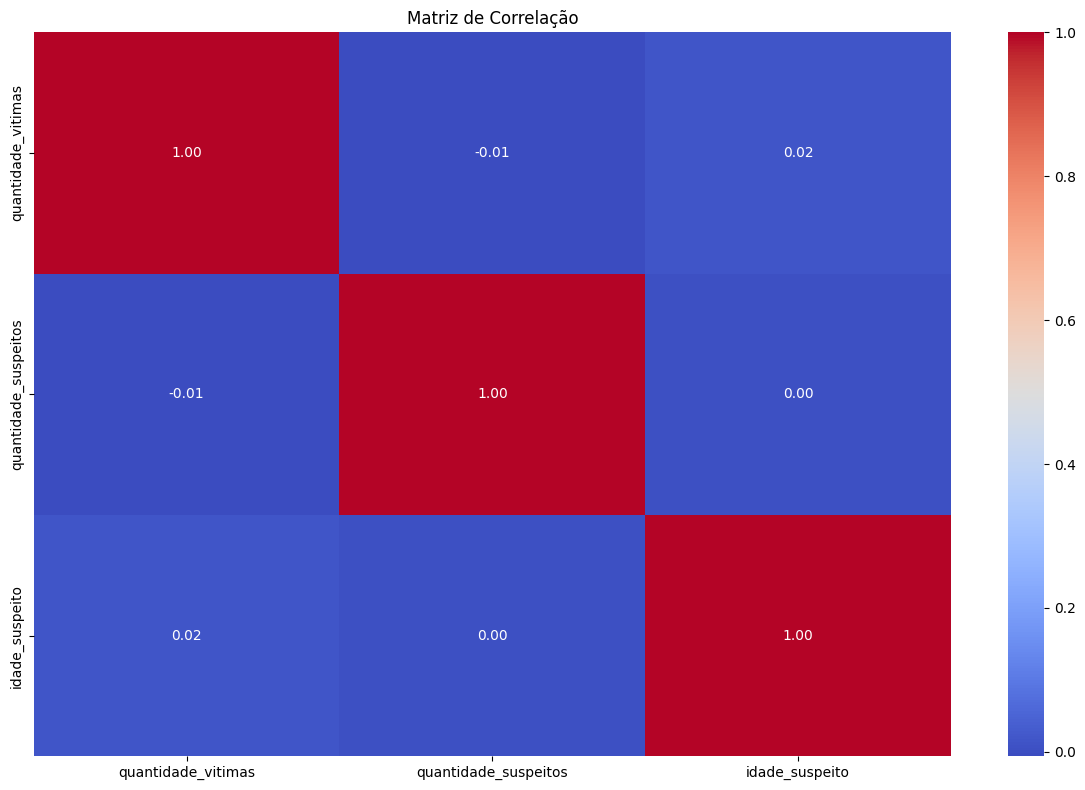

In [11]:
numericas_sem_geo = df.select_dtypes(include='number')

# Plotar a matriz de correla√ß√£o
plt.figure(figsize=(12, 8))
sns.heatmap(numericas_sem_geo.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correla√ß√£o")
plt.tight_layout()
plt.show()

##  Insights da Matriz de Correla√ß√£o

**Principais descobertas:**
- **Correla√ß√µes fracas entre vari√°veis num√©ricas**: Indica que as features s√£o relativamente independentes, o que √© positivo para modelagem
- **Aus√™ncia de multicolinearidade forte**: N√£o h√° correla√ß√µes altas (>0.8) que possam prejudicar o modelo



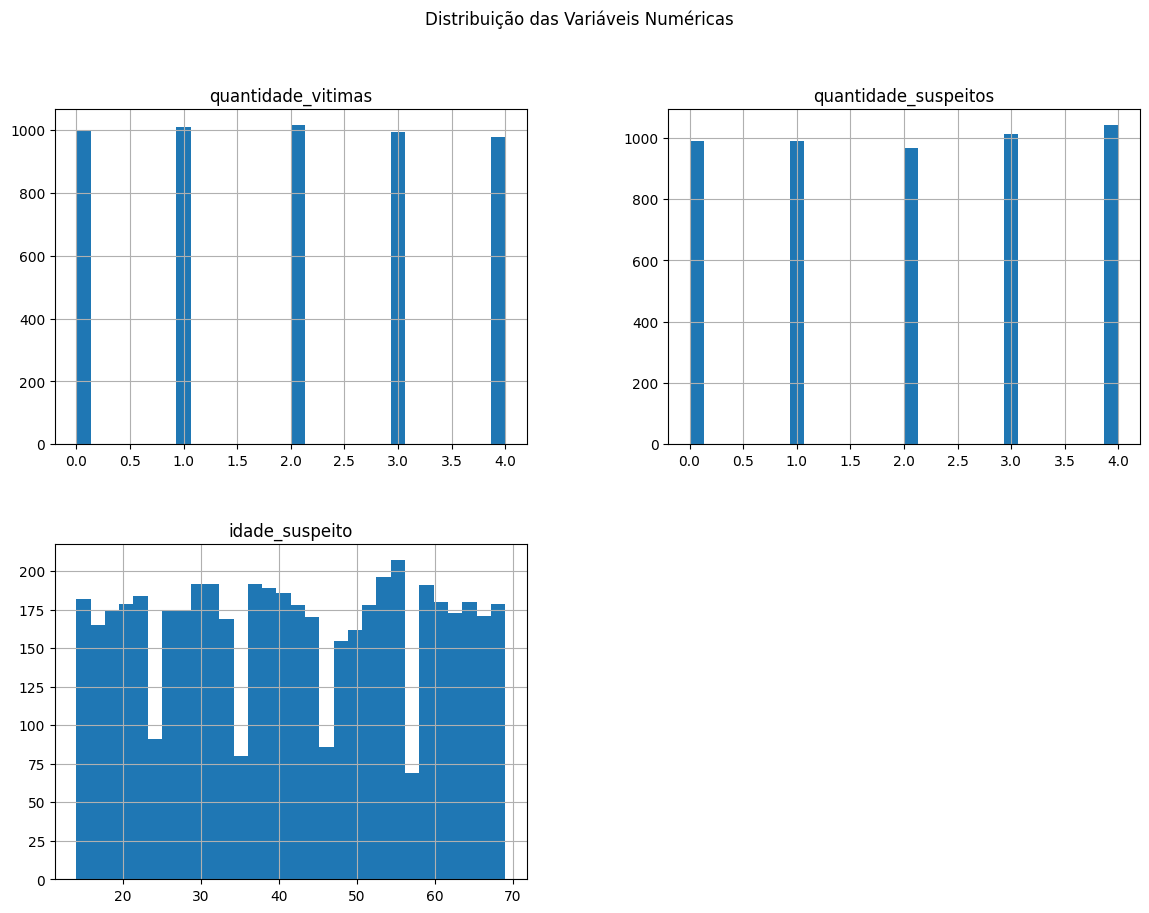

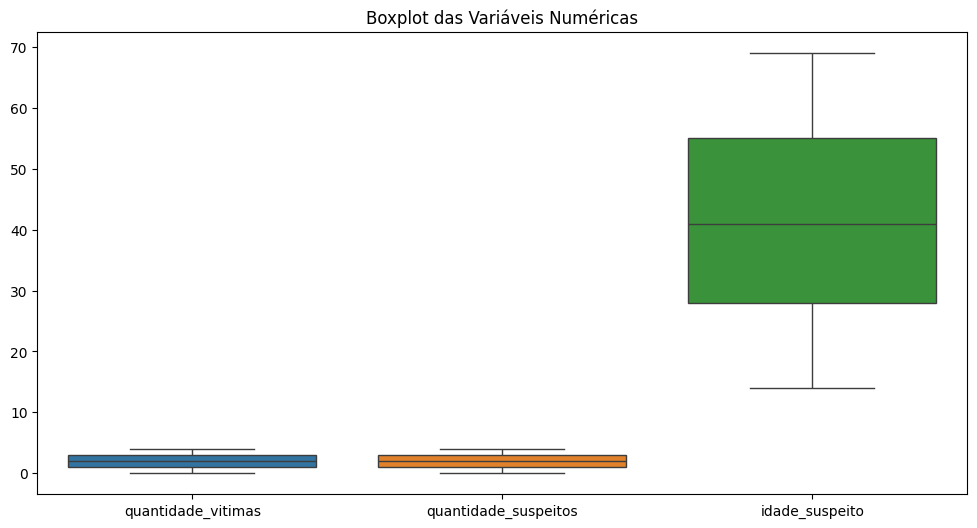

In [12]:
# Histograma
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Distribui√ß√£o das Vari√°veis Num√©ricas")
plt.show()

# Boxplot geral
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot das Vari√°veis Num√©ricas")
plt.show()


## üìà Insights das Distribui√ß√µes Num√©ricas

**Principais descobertas:**
- **Quantidade de v√≠timas e suspeitos**: Distribui√ß√µes assim√©tricas com concentra√ß√£o em valores baixos (1-3)
- **Idade dos suspeitos**: Distribui√ß√£o aparentemente normal com centro em torno de 30-40 anos
- **Presen√ßa de outliers**: Valores extremos identificados nos boxplots, principalmente em idades e quantidades

**Implica√ß√µes para modelagem:**
- **Necessidade de tratamento de outliers**: Especialmente em idade e quantidades
- **Poss√≠vel normaliza√ß√£o**: Algumas vari√°veis podem se beneficiar de transforma√ß√µes (log, sqrt)
- **Categoriza√ß√£o de idades**: Criar faixas et√°rias pode ser mais efetivo que usar idade cont√≠nua

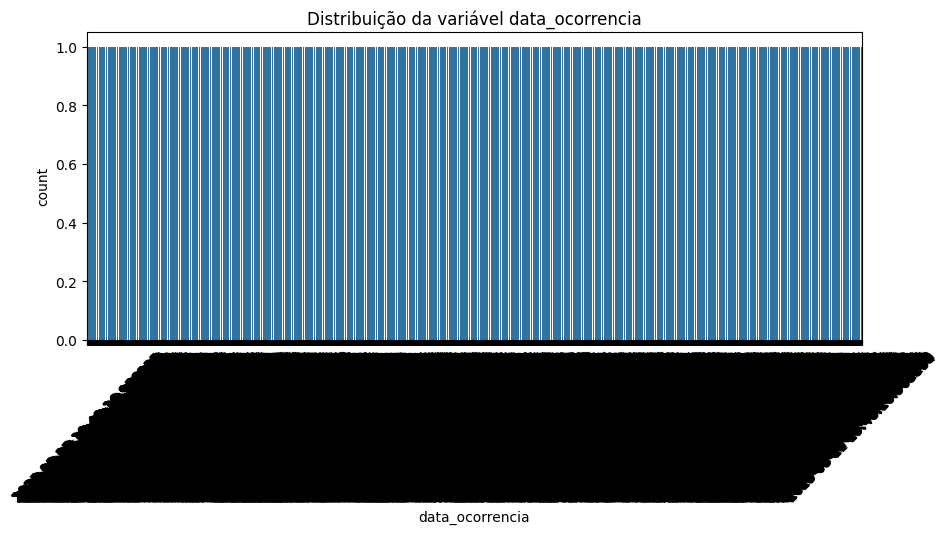

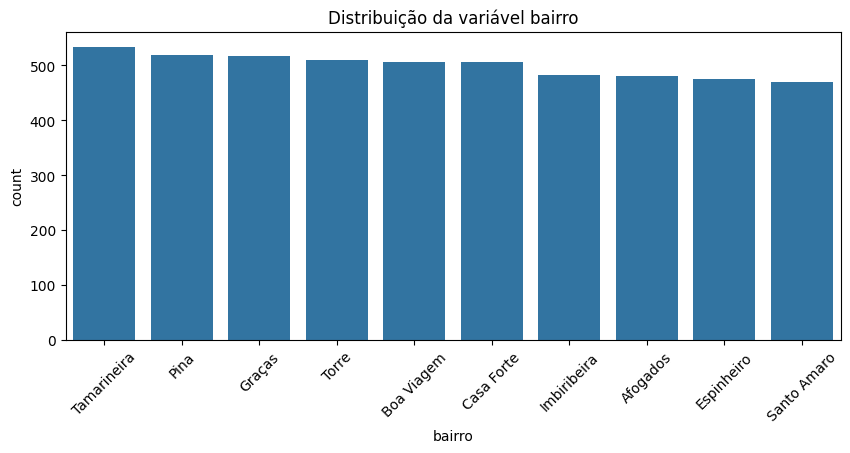

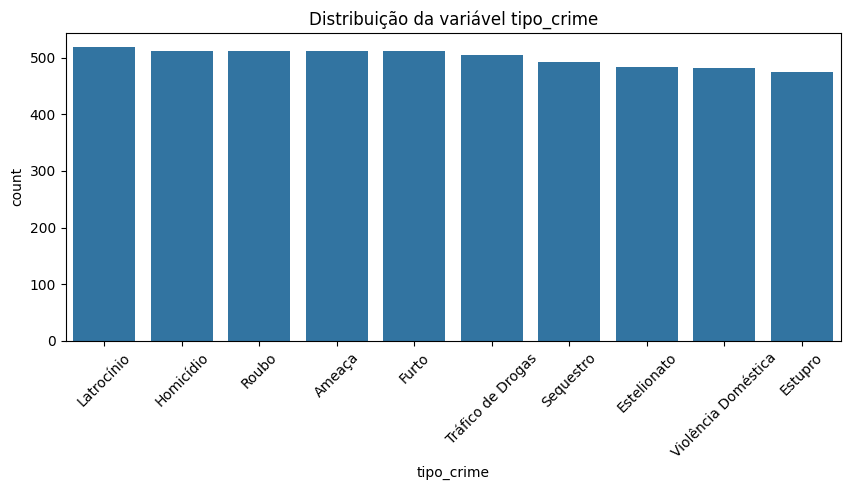

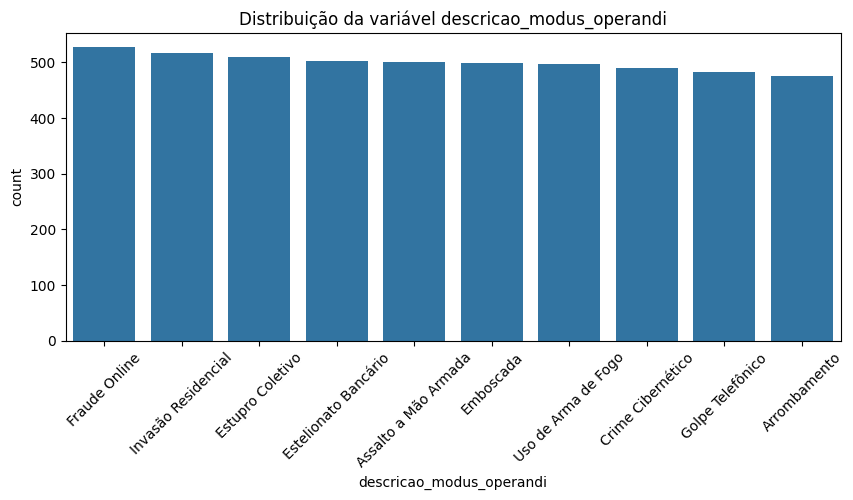

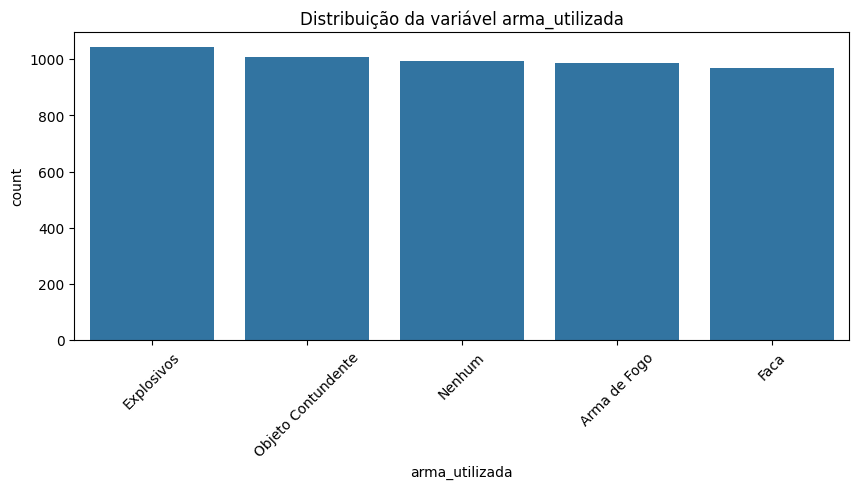

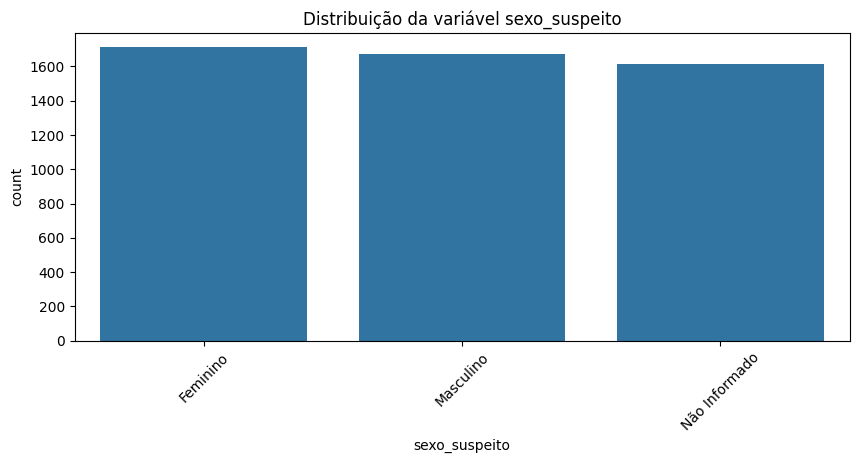

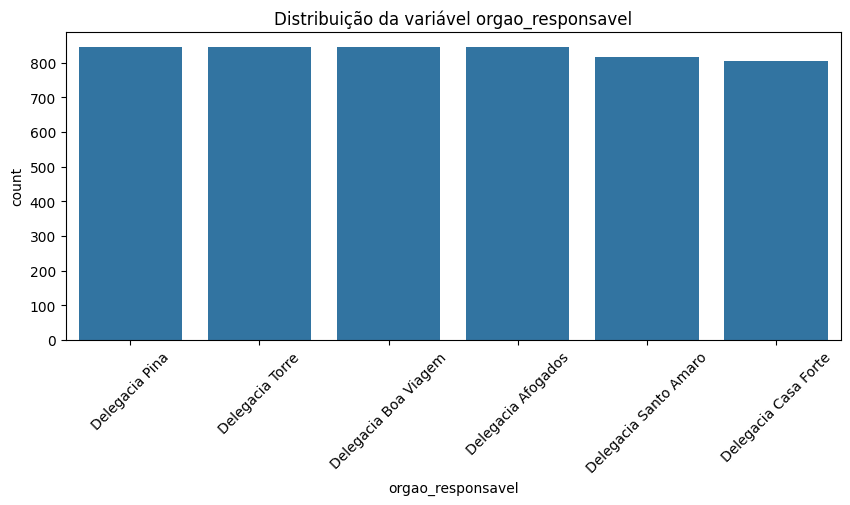

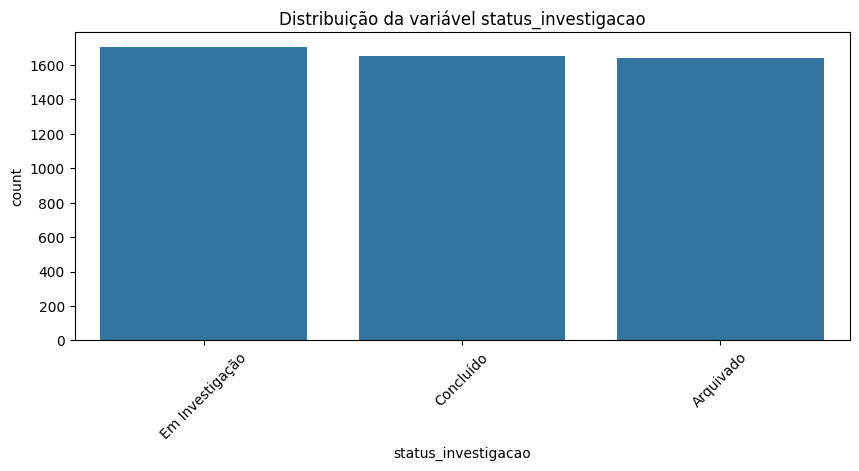

In [13]:
# Contagem de categorias
for col in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribui√ß√£o da vari√°vel {col}")
    plt.show()


## Insights das Vari√°veis Categ√≥ricas

**Principais descobertas:**
- **Bairros**: A tamarineira √© o bairro com um maior casos de crimes
- **Tipos de crime**: Certos crimes s√£o mais frequentes (Faude online e invas√£o residencial.)
- **Sexo dos suspeitos**: O sexo feminino √© um pouco mais predomin√¢nte que o masculino.
- **Armas utilizadas**: Se tem uma  prefer√™ncia por explosivos.

**Implica√ß√µes para modelagem:**
- **Encoding necess√°rio**: Todas as vari√°veis categ√≥ricas precisam ser convertidas para num√©ricas
- **Feature engineering**: Agrupar categorias raras pode melhorar a performance.

AN√ÅLISE TEMPORAL

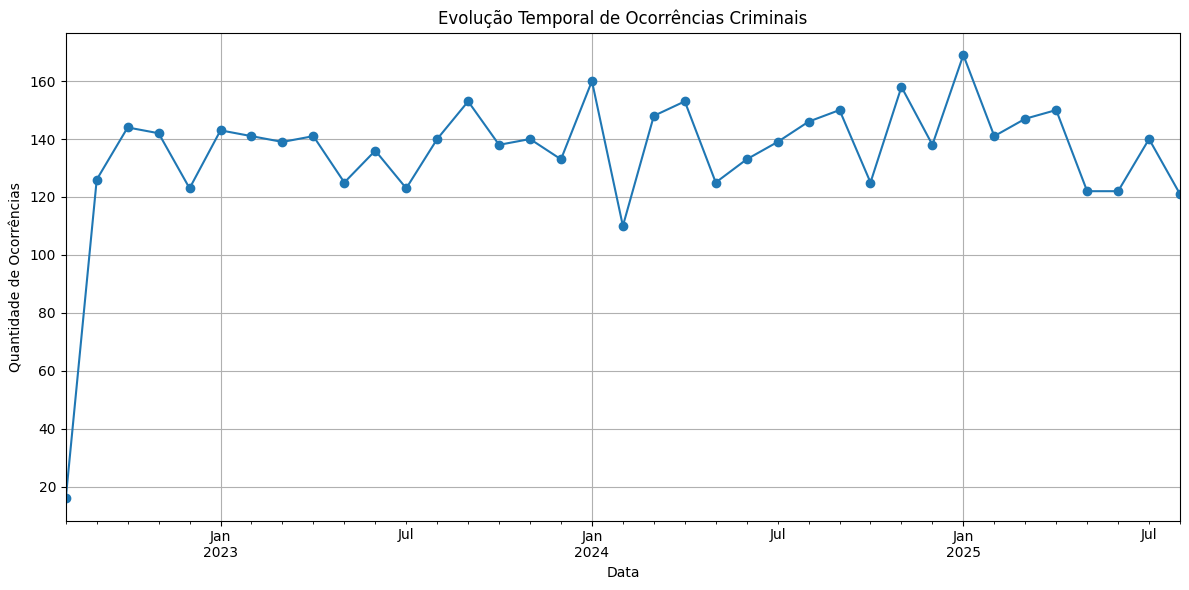

In [16]:
# Converter data
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Agrupar por m√™s
df_time = df.groupby(df["data_ocorrencia"].dt.to_period("M")).size()


# Converter o index para datetime para melhor visualiza√ß√£o no gr√°fico
df_time.index = df_time.index.to_timestamp()

# Plotar a s√©rie temporal
plt.figure(figsize=(12,6))
df_time.plot(marker='o')  # marker para visualizar os pontos
plt.title("Evolu√ß√£o Temporal de Ocorr√™ncias Criminais")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorr√™ncias")
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights da An√°lise Temporal Geral

**Principais descobertas:**
- **Tend√™ncia temporal**: Identifica√ß√£o de per√≠odos com maior/menor incid√™ncia criminal.O de maior foi em janeiro de 2025 e o menor foi em fevereiro de 2024.
- **Sazonalidade**: Poss√≠veis padr√µes mensais ou sazonais de criminalidade
- **Picos e vales**: Momentos espec√≠ficos com concentra√ß√£o anormal de crimes
- **Evolu√ß√£o ao longo do tempo**: Tend√™ncia de aumento, diminui√ß√£o ou estabilidade

**Implica√ß√µes para predi√ß√£o:**
- **Features temporais importantes**: M√™s, trimestre, ano s√£o preditores relevantes
- **Padr√µes c√≠clicos**: Modelos podem capturar comportamentos recorrentes
- **Baseline temporal**: Entender a tend√™ncia hist√≥rica como refer√™ncia para predi√ß√µes

FILTRAR POR CRIME 

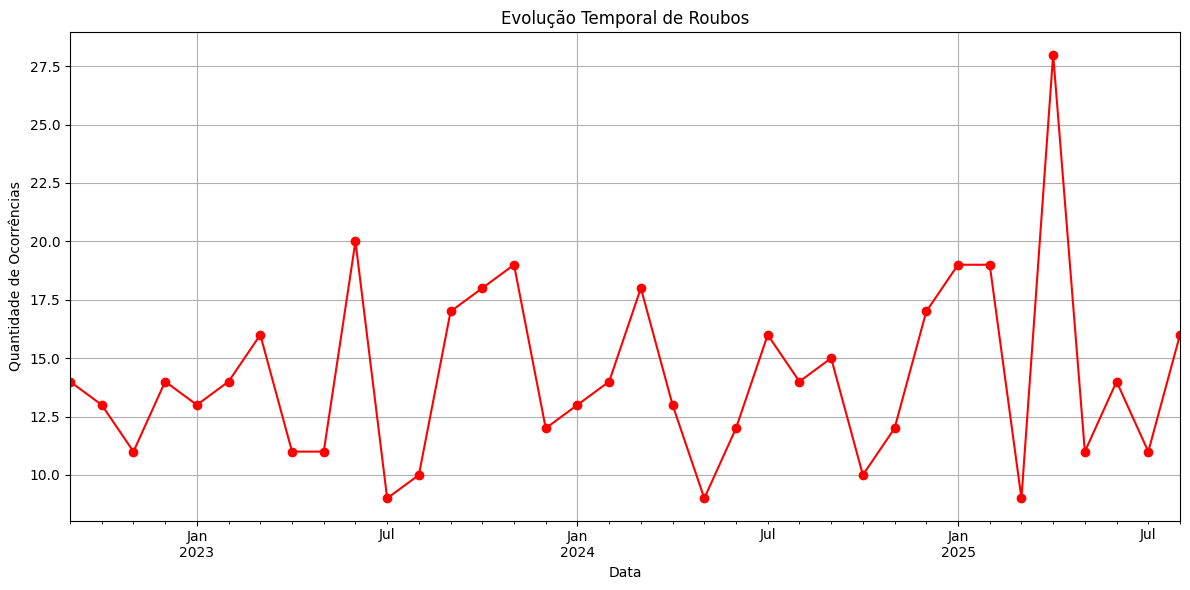

In [19]:
df_roubo = df[df["tipo_crime"] == "Roubo"]
df_time_roubo = df_roubo.groupby(df_roubo["data_ocorrencia"].dt.to_period("M")).size()
df_time_roubo.index = df_time_roubo.index.to_timestamp()

plt.figure(figsize=(12,6))
df_time_roubo.plot(marker='o', color='red')
plt.title("Evolu√ß√£o Temporal de Roubos")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorr√™ncias")
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights da An√°lise Temporal por Tipo de Crime

**Principais descobertas sobre Roubos:**
- **Padr√µes espec√≠ficos**: Roubos podem ter sazonalidade diferente de outros crimes
- **Concentra√ß√£o temporal**: Identifica√ß√£o de per√≠odos de maior risco para este tipo espec√≠fico


**Implica√ß√µes estrat√©gicas:**
- **Policiamento especializado**: Per√≠odos espec√≠ficos requerem aten√ß√£o especial para roubos.

FILTAR POR BAIRRO

<Figure size 1400x700 with 0 Axes>

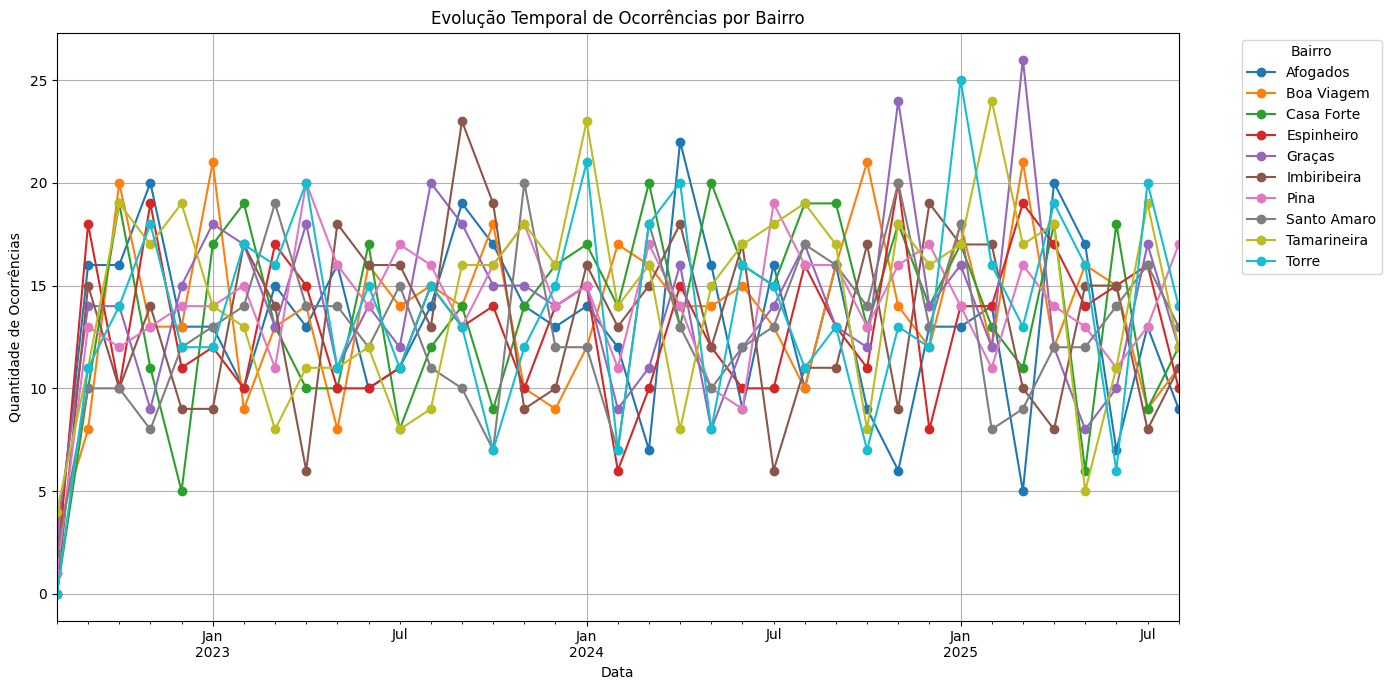

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a data
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Criar uma coluna com o m√™s/ano (per√≠odo mensal)
df["mes_ocorrencia"] = df["data_ocorrencia"].dt.to_period("M")

# Agrupar por m√™s e bairro
df_grouped = df.groupby(["mes_ocorrencia", "bairro"]).size().unstack(fill_value=0)

# Converter o √≠ndice para timestamp (datetime) para melhor plot
df_grouped.index = df_grouped.index.to_timestamp()

# Plotar todas as linhas por bairro
plt.figure(figsize=(14, 7))
df_grouped.plot(marker='o', figsize=(14, 7))

plt.title("Evolu√ß√£o Temporal de Ocorr√™ncias por Bairro")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorr√™ncias")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')  # legenda fora do gr√°fico
plt.tight_layout()
plt.show()


## Insights da An√°lise Temporal por Bairro

**Principais descobertas:**
- **Hotspots criminais**: Alguns bairros tem picos maiores em 2025 como o bairro das gra√ßas.


**Implica√ß√µes para seguran√ßa p√∫blica:**
- **Preven√ß√£o territorial**: Interven√ß√µes preventivas direcionadas por localiza√ß√£o

An√°lise Bivariada

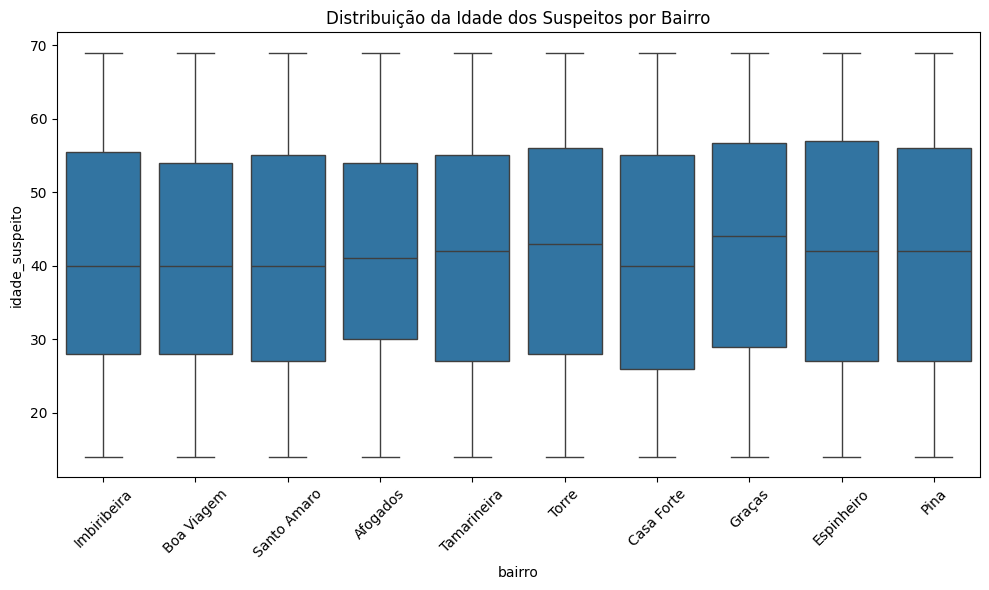

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bairro", y="idade_suspeito")
plt.title("Distribui√ß√£o da Idade dos Suspeitos por Bairro")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## üîó Insights da An√°lise Bivariada

**Idade dos Suspeitos por Bairro:**
- **Perfis et√°rios diferentes**: Cada bairro pode ter predomin√¢ncia de faixas et√°rias espec√≠ficas
- **Padr√µes socioecon√¥micos**: Correla√ß√£o entre localiza√ß√£o e perfil demogr√°fico dos suspeitos
- **Outliers de idade**: Identifica√ß√£o de casos at√≠picos que podem indicar erros ou situa√ß√µes especiais

**Implica√ß√µes para investiga√ß√£o:**
- **Perfis regionais**: Entender caracter√≠sticas dos suspeitos por √°rea facilita investiga√ß√µes
- **Estrat√©gias preventivas**: Programas sociais podem ser direcionados por faixa et√°ria/regi√£o
- **Padr√µes investigativos**: Acelerar identifica√ß√£o com base em perfis regionais t√≠picos

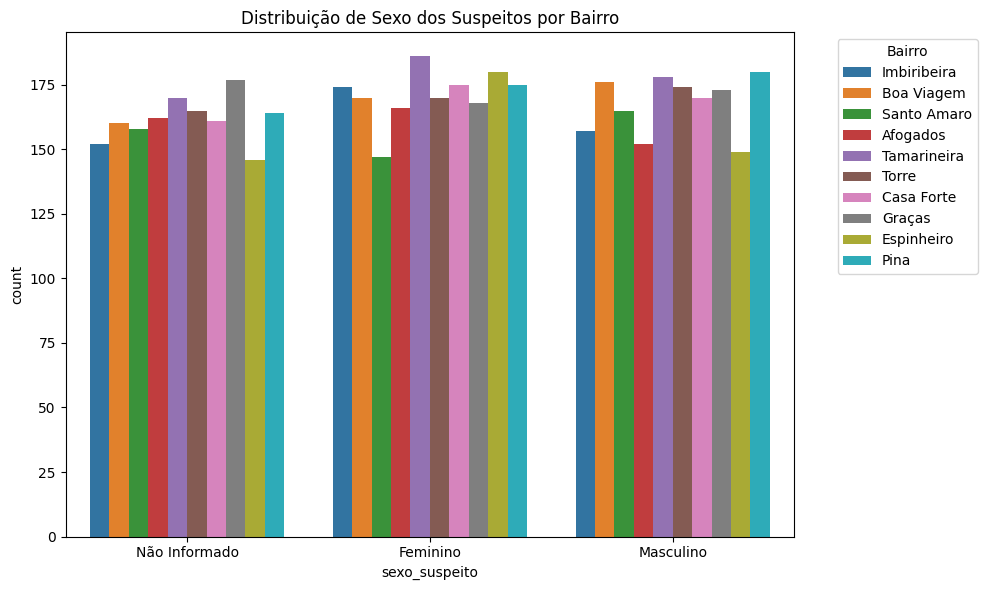

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="sexo_suspeito", hue="bairro")
plt.title("Distribui√ß√£o de Sexo dos Suspeitos por Bairro")
plt.xticks(rotation=0)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## üë• Insights do Sexo dos Suspeitos por Bairro

**Principais descobertas:**
- **Distribui√ß√£o de g√™nero**: Padr√µes de criminalidade podem variar entre sexos por regi√£o
- **Concentra√ß√£o geogr√°fica**: Alguns bairros podem ter predomin√¢ncia de suspeitos de determinado sexo
- **Casos "N√£o Informado"**: Alta incid√™ncia pode indicar problemas na coleta de dados

**Implica√ß√µes operacionais:**
- **Estrat√©gias de abordagem**: Adaptar t√°ticas conforme perfil predominante por √°rea
- **Qualidade dos dados**: Reduzir casos "N√£o Informado" melhora a qualidade das an√°lises
- **Perfis investigativos**: Acelerar investiga√ß√µes com base em padr√µes de g√™nero/localiza√ß√£o

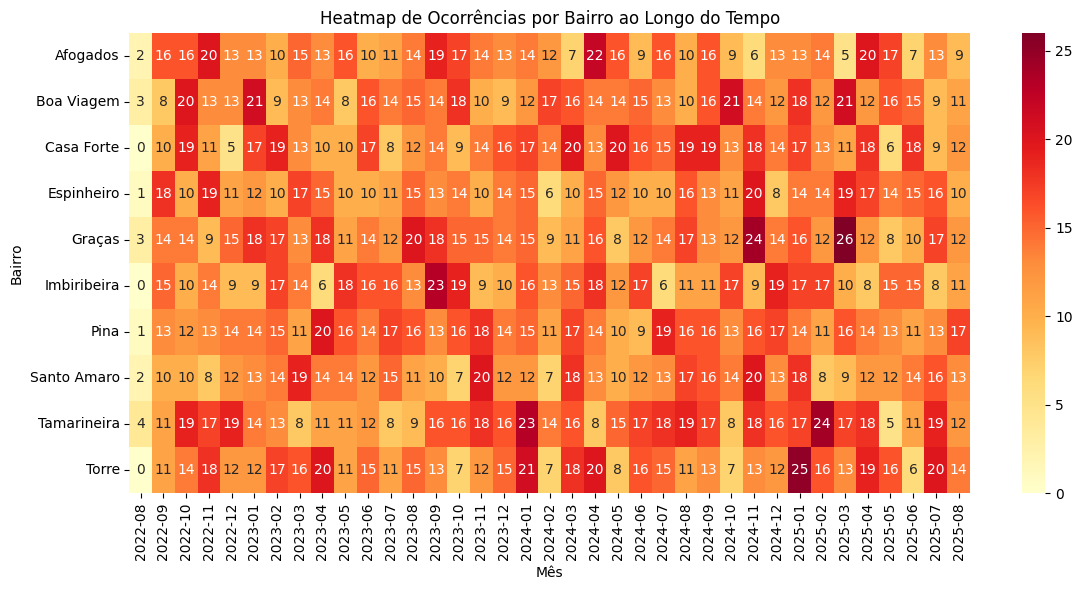

In [25]:
df["mes"] = df["data_ocorrencia"].dt.to_period("M")
df_bairro_mes = df.groupby(["mes", "bairro"]).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_bairro_mes.T, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Heatmap de Ocorr√™ncias por Bairro ao Longo do Tempo")
plt.xlabel("M√™s")
plt.ylabel("Bairro")
plt.tight_layout()
plt.show()

## Insights do Heatmap Temporal-Geogr√°fico

**Principais descobertas:**
- **Hotspots espa√ßo-temporais**: Identifica√ß√£o de combina√ß√µes bairro-per√≠odo com alta criminalidade
- **Correla√ß√µes espa√ßo-tempo**: Alguns per√≠odos afetam mais determinadas regi√µes
- **Zonas de aten√ß√£o**: C√©lulas vermelhas indicam necessidade de interven√ß√£o urgente

**Implica√ß√µes estrat√©gicas:**
- **Aloca√ß√£o temporal de recursos**: Intensificar policiamento em per√≠odos/locais espec√≠ficos
- **Planejamento anual**: Antecipar necessidades baseado em padr√µes hist√≥ricos


<Figure size 1400x700 with 0 Axes>

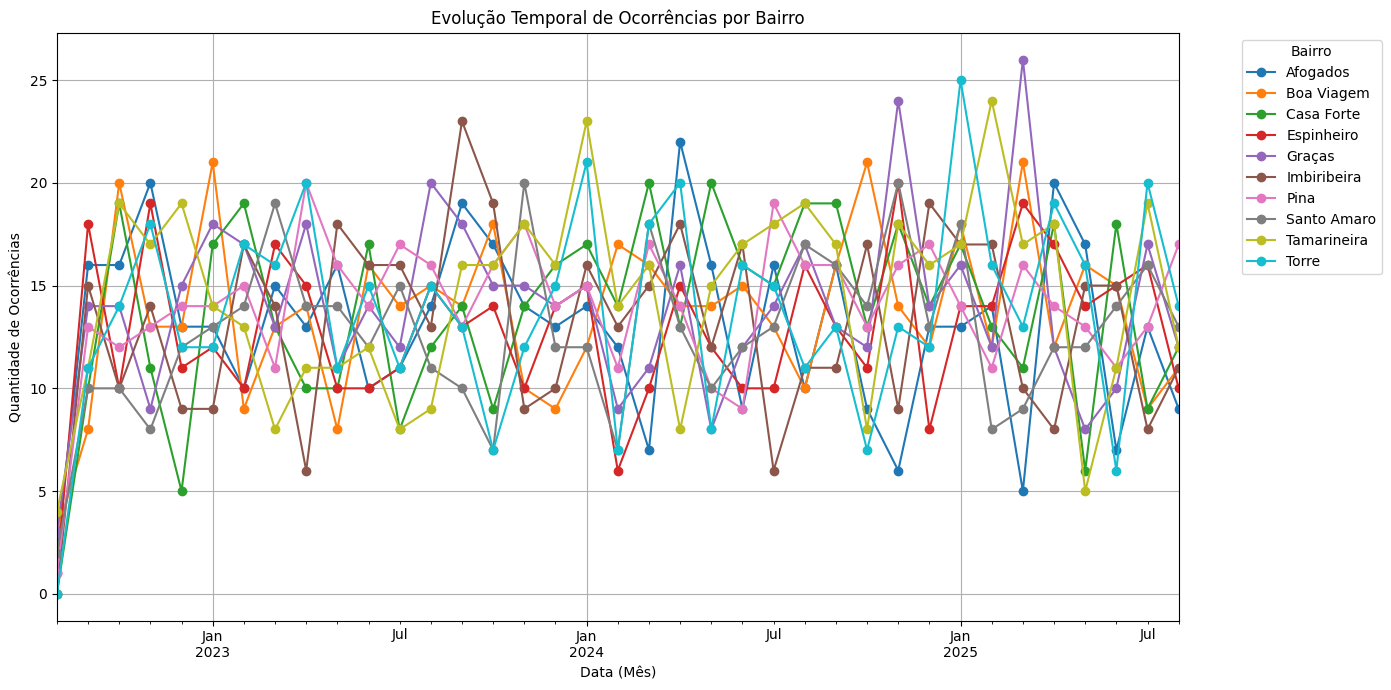

In [ ]:
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Criar uma coluna com o per√≠odo mensal
df["mes"] = df["data_ocorrencia"].dt.to_period("M")

# Agrupar por m√™s e bairro
df_grouped = df.groupby(["mes", "bairro"]).size().unstack(fill_value=0)

# Converter o √≠ndice para timestamp para plotagem
df_grouped.index = df_grouped.index.to_timestamp()

# Plotar gr√°fico de linhas
plt.figure(figsize=(14, 7))
df_grouped.plot(marker='o', figsize=(14, 7))  # m√∫ltiplas linhas, uma por bairro

plt.title("Evolu√ß√£o Temporal de Ocorr√™ncias por Bairro")
plt.xlabel("Data (M√™s)")
plt.ylabel("Quantidade de Ocorr√™ncias")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

MOSTRAR OS 5 BAIRROS QUE TEM MAIS CRIMES 

<Figure size 1400x700 with 0 Axes>

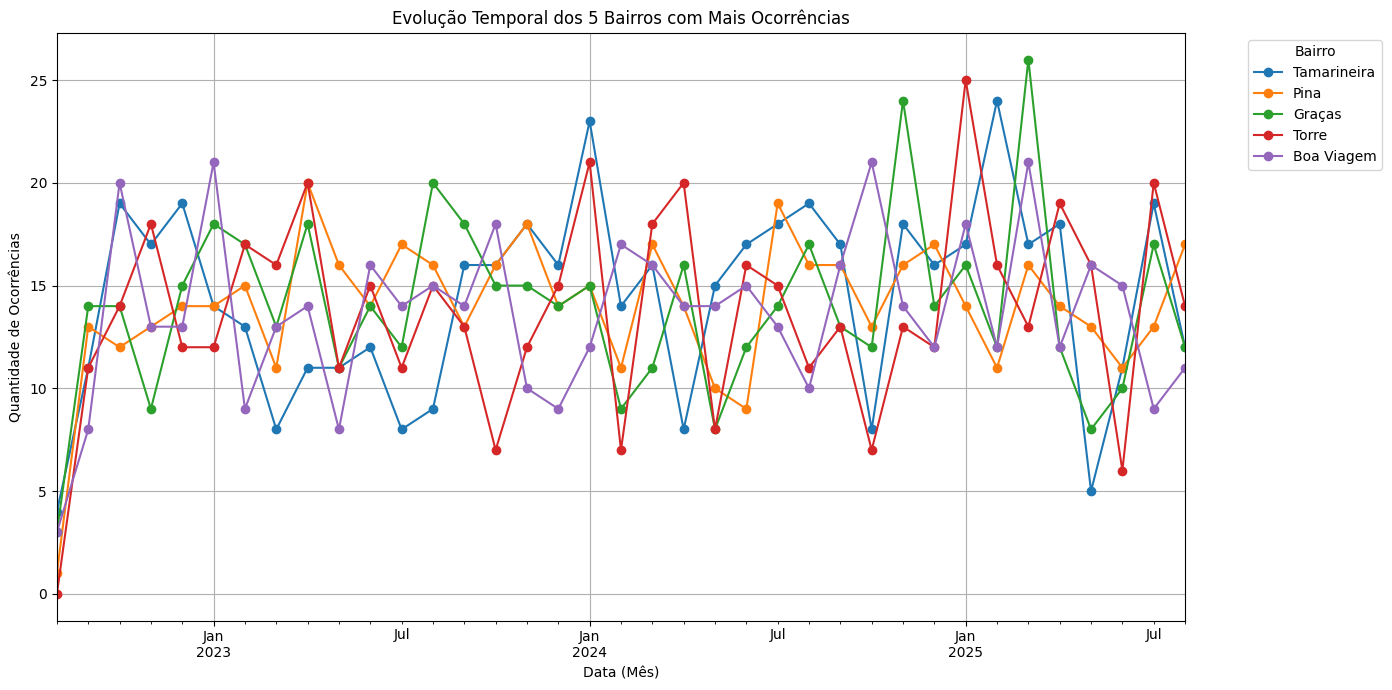

In [27]:
# Top 5 bairros com mais crimes
top_bairros = df["bairro"].value_counts().nlargest(5).index

# Filtrar apenas esses bairros no agrupamento
df_grouped_top = df_grouped[top_bairros]

# Plotar
plt.figure(figsize=(14, 7))
df_grouped_top.plot(marker='o', figsize=(14, 7))
plt.title("Evolu√ß√£o Temporal dos 5 Bairros com Mais Ocorr√™ncias")
plt.xlabel("Data (M√™s)")
plt.ylabel("Quantidade de Ocorr√™ncias")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##  Insights dos Top 5 Bairros Cr√≠ticos

**Principais descobertas:**
- **Concentra√ß√£o de criminalidade**: 5 bairros concentram a maior parte dos crimes e em determinada √©poca tem picos em alguns bairros.
- **Padr√µes distintos**: Comportamentos temporais √∫nicos requerem estrat√©gias espec√≠ficas



MOSTRAR O BAIRRO POR TIPO DE CRIME 

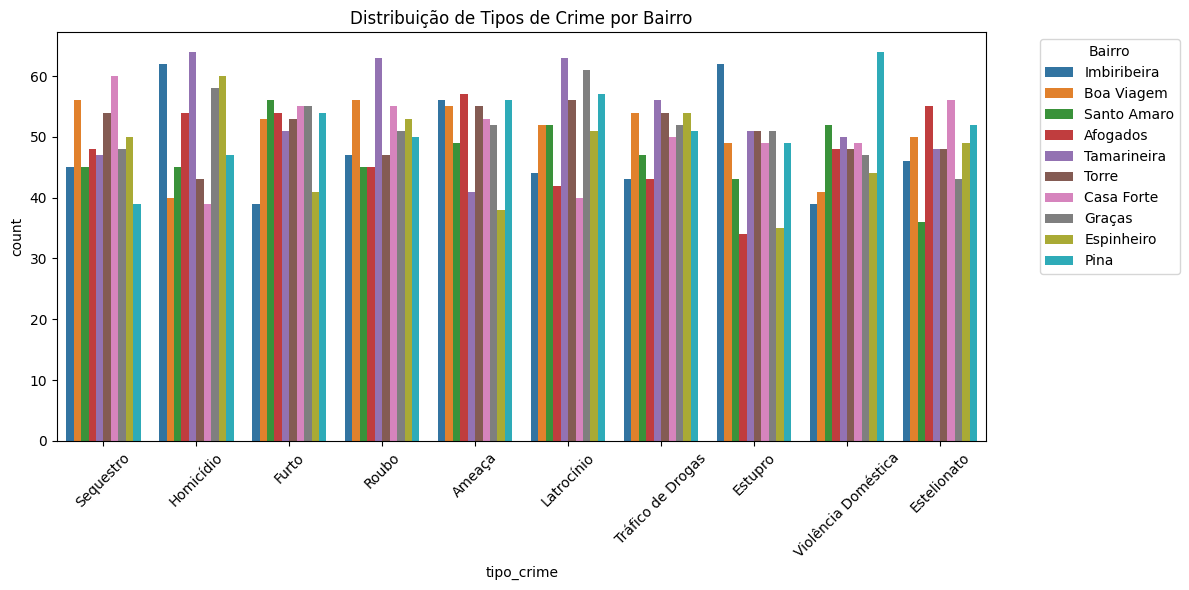

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="tipo_crime", hue="bairro")
plt.title("Distribui√ß√£o de Tipos de Crime por Bairro")
plt.xticks(rotation=45)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Insights da Distribui√ß√£o de Crimes por Bairro

**Principais descobertas:**
- **Especializa√ß√£o criminal**: A tamarineira tem mais homic√≠dios, roubos e latroc√≠nio.Enquanto Casa Forte tem tem mais sequestros e Estelionato. No pina tem mais viol√™ncia dom√©stica. E por fim imbiribeira tem mais estrupo.
- **Padr√µes regionais**: Caracter√≠sticas socioecon√¥micas influenciam tipos de crime
- **Crimes predominantes**: Identifica√ß√£o dos tipos mais comuns em cada regi√£o.


**Implica√ß√µes preventivas:**
- **Estrat√©gias especializadas**: Focar preven√ß√£o nos tipos predominantes por bairro
- **Recursos direcionados**: Alocar especialistas conforme perfil criminal regional
- **Campanhas educativas**: Adaptar mensagens preventivas por tipo de crime/regi√£o
- **Intelig√™ncia criminal**: Entender motiva√ß√µes e oportunidades por √°rea

Outliers

In [31]:
from scipy.stats import zscore
import numpy as np

# Selecionar colunas num√©ricas relevantes
numericas = df.select_dtypes(include='number').drop(columns=["latitude", "longitude"])

# Calcular Z-scores
z_scores = zscore(numericas)

# Identificar outliers com Z-score > 3 ou < -3
outliers = df[(np.abs(z_scores) > 3).any(axis=1)]

# Mostrar resultado
print(f"Outliers detectados: {outliers.shape[0]}")
display(outliers)


Outliers detectados: 0


Empty DataFrame
Columns: [id_ocorrencia, data_ocorrencia, bairro, tipo_crime, descricao_modus_operandi, arma_utilizada, quantidade_vitimas, quantidade_suspeitos, sexo_suspeito, idade_suspeito, orgao_responsavel, status_investigacao, latitude, longitude, mes_ocorrencia, mes]
Index: []

## Insights da An√°lise de Outliers

**Principais descobertas:**
- **Casos extremos identificados**: N√£o teve nenhum Outliers, est√° tudo dentro do padr√£o.



# RECOMENDA√á√ïES PARA PR√â-PROCESSAMENTO

Com base na an√°lise explorat√≥ria realizada, as seguintes etapas s√£o essenciais para preparar os dados para modelagem:


- **Valida√ß√£o de datas**: Tranformar a coluna de data de ocorr√™ncia em tr√™s para extrair ano, m√™s , dia e hor√°rio.

e




## üè∑Ô∏è 4. Encoding de Vari√°veis Categ√≥ricas
- **One-Hot Encoding**: Para vari√°veis com poucas categorias (sexo, status_investigacao)


## ‚è∞ 5. Engenharia de Features Temporais
- **Extra√ß√£o de componentes**: Ano, m√™s, dia da semana, hora
- **Sazonalidade**: Trimestre, esta√ß√£o do ano
- **Features c√≠clicas**: sin/cos para capturar ciclicidade temporal
- **Lag features**: Crimes dos per√≠odos anteriores para capturar tend√™ncias



## üìä 7. Balanceamento de Classes
- **Verificar desbalanceamento**: Principalmente na vari√°vel target 




## üéØ 8. Sele√ß√£o e Cria√ß√£o da Vari√°vel Target
- **Definir objetivo**: Crime  (quantos crimes ir√£o acontecer em um determinado bairro naquele m√™s )
- **Agrega√ß√£o temporal**: Definir janela de predi√ß√£o (pr√≥ximo m√™s, semana, dia)


## üîç 9. Feature Selection
- **Remo√ß√£o de redund√¢ncias**: Eliminar features altamente correlacionadas
- **Import√¢ncia**: Usar m√©todos como SelectKBest, RFE ou import√¢ncia do Random Forest
- **Vazamento de dados**: Remover features que n√£o estar√£o dispon√≠veis na predi√ß√£o

## ‚úÖ 10. Valida√ß√£o e Splits
- **Divis√£o temporal**: Train/test respeitando ordem cronol√≥gica
- **Valida√ß√£o cruzada**: Time series split para respeitar temporalidade
- **Estratifica√ß√£o**: Manter propor√ß√µes de classes e bairros

## üìà 11. Pipeline de Preprocessamento
- **Criar pipeline**: Sequ√™ncia reproduz√≠vel de transforma√ß√µes
- **Salvar transformadores**: Fitted encoders e scalers para usar em produ√ß√£o
- **Documenta√ß√£o**: Registrar todas as transforma√ß√µes aplicadas

---

**‚ö†Ô∏è ATEN√á√ÉO ESPECIAL:**
- **Temporalidade**: Nunca usar informa√ß√µes futuras para predizer o passado
- **Vazamento geogr√°fico**: Cuidado com features que podem "vazar" a localiza√ß√£o exata
- **Reprodutibilidade**: Fixar random_state em todas as opera√ß√µes aleat√≥rias
- **Monitoramento**: Acompanhar distribui√ß√µes antes/depois das transforma√ß√µes

**üéØ PR√ìXIMO PASSO:** Implementar essas transforma√ß√µes no notebook `processamento.ipynb`